In [48]:
import pandas as pd
import numpy as np
import random


# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [49]:
data = pd.read_csv("data.csv")

In [50]:
data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


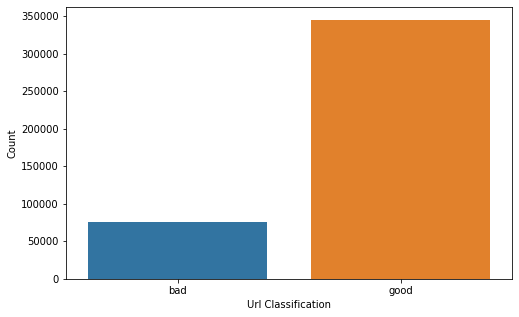

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=data)
plt.xlabel('Url Classification')
plt.ylabel('Count')
plt.show()

In [52]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))
    if 'com' in total_Tokens:
        total_Tokens.remove('com')
    return total_Tokens


In [53]:
y = data["label"]


In [54]:
url_list = data["url"]

In [55]:

vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [77]:
X = vectorizer.fit_transform(url_list)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION

In [62]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9616377106298979


In [24]:
#X_predict = ["www.itidea.it/centroesteticosothys/img/_notes/gum.exe"]

In [18]:
#X_predict = vectorizer.transform(X_predict)
#New_predict = logit.predict(X_predict)

In [19]:
#print(New_predict)

['bad']


In [81]:
from tkinter import *
#Create an instance of Tkinter frame or window
root= Tk()
root.title('PHISHING DETECTION')
#Set the geometry of tkinter frame
root.geometry("750x300")
def mydelete():
        myLabel.destroy()
        checkbutton['state']=NORMAL
        entry.delete(0,'end')
        
        
def callback():
        global myLabel
        
        X_predict=[]
        t=entry.get()
        X_predict.append(t)
        entry.delete(0,'end')
        X_predict = vectorizer.transform(X_predict)
        New_predict = mnb.predict(X_predict)
        if(New_predict[0]=='good'):
            myLabel=Label(root, text="Don't worry,it's Legitimate url", fg="green",font=('helvetica 20 bold'))
           
            myLabel.pack(pady=4)
            
        else:
            myLabel=Label(root, text="It's Phishing url",fg="red" ,font=('helvetica 20 bold'))
            myLabel.pack(pady=4)
        checkbutton['state']=DISABLED
        
            



title=Label(root, text="PHISHING URL DETECTOR", font=('helvetica 20 bold'))
title.pack(pady=4)
entry=Entry(root,width=60)
entry.pack(ipadx=15,ipady=5)

checkbutton=Button(root,text="check url",bg="blue",fg="white",font=(10),command=callback)
checkbutton.pack(pady=10)

clearButton=Button(root,text="clear",bg="red",fg="white",font=(10),command=mydelete)
clearButton.pack(pady=10)
root.mainloop()

# NAIVE BAYES

In [19]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print("Accuracy ",mnb.score(X_test, y_test))

Accuracy  0.9686299692007658


In [20]:
X_predict = ["google.com/search=jcharistech","www.itidea.it/centroesteticosothys/img/_notes/gum.exe"]

In [21]:
X_predict = vectorizer.transform(X_predict)
New_predict = mnb.predict(X_predict)

In [22]:
print(New_predict)

['good' 'bad']


In [82]:
from tkinter import *
#Create an instance of Tkinter frame or window
root= Tk()
root.title('PHISHING DETECTION')
#Set the geometry of tkinter frame
root.geometry("750x300")
def mydelete():
        myLabel.destroy()
        checkbutton['state']=NORMAL
        entry.delete(0,'end')
        
        
def callback():
        global myLabel
        
        X_predict=[]
        t=entry.get()
        X_predict.append(t)
        
        X_predict = vectorizer.transform(X_predict)
        New_predict = mnb.predict(X_predict)
        if(New_predict[0]=='good'):
            myLabel=Label(root, text="Don't worry,it's Legitimate url", fg="green",font=('helvetica 20 bold'))
           
            myLabel.pack(pady=4)
            
        else:
            myLabel=Label(root, text="It's Phishing url",fg="red" ,font=('helvetica 20 bold'))
            myLabel.pack(pady=4)
        checkbutton['state']=DISABLED
        
            



title=Label(root, text="PHISHING URL DETECTOR", font=('helvetica 20 bold'))
title.pack(pady=4)
entry=Entry(root,width=60)
entry.pack(ipadx=15,ipady=5)

checkbutton=Button(root,text="check url",bg="blue",fg="white",font=(10),command=callback)
checkbutton.pack(pady=10)

clearButton=Button(root,text="clear",bg="red",fg="white",font=(10),command=mydelete)
clearButton.pack(pady=10)
root.mainloop()